In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
study_folder = r"C:\Users\Tobias\Nextcloud\clientsync\UNI\Masterarbeit\Auswertung\Parameterstudien\Frames_3cam_rotY400_ObjectCenter"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

In [3]:
PSets_Eval.index = PSets_Eval["images"] / PSets_Info["cam_number"]

Berechne Fehler in den morphologischen Größen und füge sie dem Evaluierungsdatensatz hinzu

In [4]:
sphericity_error_perc = (PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]) / PSets_Eval["sphericity_ref"]*100
vol_error_perc = (PSets_Eval["volume_rec"] - PSets_Eval["volume_ref"]) / PSets_Eval["volume_ref"]*100
PSets_Eval["sphericity_error_perc"] = sphericity_error_perc; PSets_Eval["vol_error_perc"] = vol_error_perc; 

Berechne die Positionsfehlerquote

In [5]:
r_PFQ_perc  = PSets_Eval["cam_outliers"] / PSets_Eval["rec_cams"] *100
PSets_Eval["r_PFQ_perc"] = r_PFQ_perc; 

Verkleinerer den Evaluierungsdatensatz auf die relevanten Größen

In [6]:
PSets_Eval["cam_mean_error_perc"]  = PSets_Eval["cam_mean_rel_error"]*100
PSets_Eval_small = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc"]]
PSets_Eval_small_qual = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc","quality_index"]]

Plotte Auswertungsgröße über die varrierten Größe

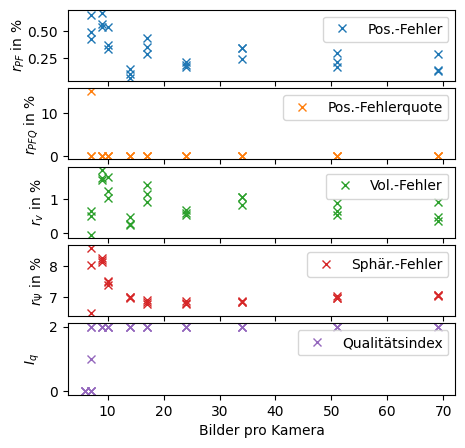

In [7]:
#PSets_Eval_small_qual.index = PSets_Eval["images"] / PSets_Info["cam_number"]
#PSets_Eval.index = PSets_Eval["images"] / PSets_Info["cam_number"]
#PSets_Eval_small.index = PSets_Eval["images"] / PSets_Info["cam_number"]

axes = PSets_Eval_small_qual.plot(subplots=True, figsize=(5, 5), style='x')
#plt.xticks([2, 3, 4, 5, 6])
plt.xlabel("Bilder pro Kamera")
axes[0].legend(["Pos.-Fehler"]); axes[0].set_ylabel("$r_{PF}$ in %",labelpad=0)
axes[1].legend(["Pos.-Fehlerquote"]); axes[1].set_ylabel("$r_{PFQ}$ in %",labelpad=0)
axes[2].legend(["Vol.-Fehler"]); axes[2].set_ylabel("$r_{v}$ in %",labelpad = 2)
axes[3].legend(["Sphär.-Fehler"]); axes[3].set_ylabel("$r_\Psi$ in %",labelpad=2)
axes[4].legend(["Qualitätsindex"]); axes[4].set_ylabel("$I_q$",labelpad=5)
plt.subplots_adjust(hspace=0.1)
#plt.savefig("distance_eval_5subplots.svg", format="svg")
plt.show()


In [ ]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
importlib.reload(sys.modules['Figures.plot_quality_critieria']) if 'Figures.plot_quality_critieria' in sys.modules else None
from Figures.plot_quality_critieria import plot_4_quality_criteria

savefig_folder = None # r"C:\Users\Tobias\Nextcloud\clientsync\UNI\Masterarbeit\Auswertung\Frames" #without image format
figsize = (6,4)
marker = "D"
markersize = 20
markersize_legend = markersize /3.8
grid = True
xticks = [0,25,50,75] # None
optimal_span = [14, 75] # None
labelpad = [0, 0, 0, 0]
one_decimal_place = False
font_size = 10
legend_loc = "upper right"
arrows_color = "black" # None: --> Farbe des Pfeils ist abhängig vom Qualitätsindex
y_limits = [(-0.1, 0.8), (-1, 20), (-0.2, 2), (6, 10)]
plot_x0_line = True
xlabel= "Bilder pro Kamera"
mark_base_case = 15

fig, ax = plot_4_quality_criteria(PSets_Eval_small_qual, savefig_folder, figsize, xlabel ,marker,markersize, 
                            arrows_color, font_size, labelpad, xticks, grid,
                            one_decimal_place, plot_x0_line, markersize_legend, legend_loc, optimal_span, y_limits,mark_base_case)


In [9]:
scatter = ax[0,0].collections[0]
data = scatter.get_offsets()
x_data = data[:, 0]
y_data = data[:, 1]
print("x-Daten:", x_data)
print("y-Daten:", y_data)

x-Daten: [-- -- -- -- -- -- 7.0 7.0 7.0 9.0 9.0 9.0 10.0 10.0 10.0 14.0 14.0 14.0
 17.0 17.0 17.0 24.0 24.0 24.0 34.0 34.0 34.0 51.0 51.0 51.0 69.0 69.0
 69.0]
y-Daten: [-- -- -- -- -- -- 0.48871414044208 0.6461080921401501 0.42935602794467004
 0.56690487979965 0.66860033970293 0.53639543026645 0.53448247521832
 0.37010171169561 0.33110244317104004 0.1457663101302 0.06277236472062
 0.10153301616980001 0.28732505144387 0.43395853181154004 0.34613584660476
 0.21200888271465002 0.15996951030931 0.18036196417071 0.33946772032945
 0.3409365955075 0.23713436940438 0.21424575368648 0.29030589259674
 0.16212498890114 0.28179468924171 0.13424023955143 0.12991658765311]


In [10]:
PSets_Eval

,Scaling_median,Scaling_std,Mesh2MeshDist_mean,Mesh2MeshDist_std,volume_ref,volume_rec,surface_ref,surface_rec,sphericity_ref,sphericity_rec,...,cam_std_rel_error,cam_outliers,cam_threshold,rec_cams,images,quality_index,sphericity_error_perc,vol_error_perc,r_PFQ_perc,cam_mean_error_perc
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,6,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,7,18,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,0.000011,NaN,0.003591,NaN,0.671746,NaN,...,NaN,NaN,0.01,8,21,0,NaN,NaN,NaN,NaN
7.0,0.399611,0.000381,0.000045,0.000140,0.000011,0.000011,0.003591,0.003335,0.671746,0.725690,...,0.000985,0.0,0.01,20,21,2,8.030451,0.520718,0.0,0.488714
7.0,0.399644,0.000421,0.000062,0.000181,0.000011,0.000011,0.003591,0.003372,0.671746,0.715242,...,0.002830,3.0,0.01,20,21,1,6.475031,-0.033405,15.0,0.646108
7.0,0.399619,0.000362,0.000045,0.000136,0.000011,0.000011,0.003591,0.003321,0.671746,0.729477,...,0.000986,0.0,0.01,20,21,2,8.594163,0.643088,0.0,0.429356
9.0,0.401715,0.000149,0.000022,0.000114,0.000011,0.000011,0.003591,0.003353,0.671746,0.726998,...,0.000320,0.0,0.01,24,27,2,8.225101,1.600814,0.0,0.566905


In [11]:
# Aktuelles Verzeichnis in Jupyter-Notebook
parentparent_dir = Path.cwd().resolve().parent.parent
style_path = parentparent_dir / 'thesis.mplstyle'
# Stil anwenden
plt.style.use(str(style_path))

x = PSets_Info["cam_fps"]
y = y = PSets_Eval["images"].values / PSets_Info["cam_number"].values

fig, ax = plt.subplots(figsize=(3, 2.5))  # Erstellen einer Figur und eines Subplots
ax.scatter(x, y,marker="D",s=15,label = "Messwerte")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Kamerafrequenz $f_{fps}$ in $s^{-1}$")  # Beschriftung der x-Achse
ax.set_ylabel("Bilder pro Kamera")  # Beschriftung der y-Achse
ax.grid(True)
#ax.set_xlim([0,1.05])
#ax.set_xticks([0, 0.2, 0.4, 0.6,0.8,1])
#ax.set_ylim([0,150])


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
x_poly = np.linspace(0,1000)
y_poly =  poly1d_fn(x_poly)
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(x_poly,y_poly, '--r',linewidth = 1,label= "Linearer Fit")


# # Calculate R-squared value
y_pred = poly1d_fn(x)
ss_res = np.sum((y - y_pred)** 2)  # Sum of squared residuals
ss_tot = np.sum((y - np.mean(y))** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Display the equation and R-squared on the plot
a, b = coef  # coefficients for y = ax + b
equation_text = f"$y = {a:.3f}x {'+' if b >= 0 else ''}{b:.3f}$\n$R^2 = {r_squared:.4f}$"

ax.text(400, 10, equation_text, fontsize=10, color="black")
plt.legend()
#plt.savefig("NumberImages_fps.svg",bbox_inches="tight")
plt.show()  # Anzeigen des Plots

inverse Funktion

In [12]:
images2frames_fct = lambda images: (images - b) / a

images1 = [5,7,9,11,13,15,17,20,25,35,45,55,65]
images2 = [6,7,8,10,12,15,20,25,30,40,50,60,70] 
frames1 = images2frames_fct(images1)
frames2 = images2frames_fct(images2)
frames3 = [90,105,120,145,175,220,290,365,440,585,730,875,1020]
images3 = np.round(poly1d_fn(frames3))
images3

array([ 6.,  7.,  8., 10., 12., 15., 20., 25., 30., 40., 50., 60., 70.])

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

#ax.scatter(frames1,images1, marker='D',label = "Satz 1")
ax.scatter(frames2,images2, marker='D',label = "Satz 2")
ax.grid(True)
ax.set_ylabel("Bilder pro Kamera")
ax.set_xlabel("Kamerafrequenz in 1/s")
ax.legend()

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(PSets_Eval["images"], PSets_Eval["sphericity_error_perc"], marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Gesamtanzahl an Bildern")
ax[0].set_ylabel("Relativer Sphärizitätsfehler $r_\Psi$ in %")
#ax[0].set_xlim([0,1])
#ax[0].set_ylim([4,14])

ax[1].scatter(PSets_Eval["images"], PSets_Eval["vol_error_perc"], marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Gesamtanzahl an Bildern")
ax[1].set_ylabel("Relativer Volumenfehler $r_V$ in %")
#ax[1].set_xlim([0,1])
#ax[1].set_ylim([-1,10])
plt.show()


Laufzeitanalyse

In [15]:
fig, ax = plt.subplots(figsize=(3,2.5))  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="D",s=15)  # Erstellen eines Scatter-Plots
ax.set_xlabel("Gesamtanzahl an Bildern")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

In [16]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Bilder")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

In [17]:
from scipy.stats import pearsonr

outliers = 3

y = PSets_Eval.loc[np.isfinite(PSets_Eval["vol_error_perc"]), "vol_error_perc"].values
x = (PSets_Eval.loc[np.isfinite(PSets_Eval["vol_error_perc"]), "cam_mean_error_perc"].values)
x_wo_outlier = x[outliers:]    # ohne outlier
y_wo_outlier =  y[outliers:]
res = pearsonr(x,y)
res_wo_outlier = pearsonr(x_wo_outlier,y_wo_outlier)

# Aktuelles Verzeichnis in Jupyter-Notebook
parentparent_dir = Path.cwd().resolve().parent.parent
style_path = parentparent_dir / 'thesis.mplstyle'
# Stil anwenden
plt.style.use(str(style_path))

fig, axes = plt.subplots(1,2,figsize=(5.5, 2.5),sharey=True)  # Erstellen einer Figur und eines Subplots

####################################################################
ax = axes[0]
ax.scatter(x[outliers:], y[outliers:],marker="D",s=15,label="Inlier")  # Erstellen eines Scatter-Plots
ax.scatter(x[0:outliers], y[0:outliers],marker="D",s=15,label="Outlier")  # Erstellen eines Scatter-Plots
ax.set_ylabel("$r_{V}$ in $\%$")  # Beschriftung der x-Achse
ax.set_xlabel("$r_{PF}$ in $\%$")  # Beschriftung der y-Achse
ax.grid(True)
correlation_text = f"$r_{{x,y}} =$ {res[0]:.3f} \n$R^2 =$ {res[0]**2:.3f}"
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
x_poly = np.linspace(0,0.7)
y_poly =  poly1d_fn(x_poly)
# poly1d_fn is now a function which takes in x and returns an estimate for y
ax.plot(x_poly,y_poly, '--r',linewidth = 1,label= "Linearer Fit")
ax.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=10, ha='left', va='top')
######################################################
ax = axes[1]
ax.scatter(x_wo_outlier, y_wo_outlier,marker="D",s=15)  # Erstellen eines Scatter-Plots
ax.set_xlabel("$r_{PF}$ in $\%$")  # Beschriftung der y-Achse
ax.grid(True)
correlation_text = f"$r_{{x,y}} =$ {res_wo_outlier[0]:.3f} \n$R^2 =$ {res_wo_outlier[0]**2:.3f}"
coef = np.polyfit(x_wo_outlier,y_wo_outlier,1)
poly1d_fn = np.poly1d(coef) 
y_poly =  poly1d_fn(x_poly)
ax.plot(x_poly,y_poly, linestyle= '--', color = "red", linewidth = 1,label= "Linearer Fit")
ax.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction',

            fontsize=10, ha='left', va='top')
############################################################################
handles, labels = axes[0].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='lower right',fontsize = 10,labelspacing=0.2,borderpad=0.3)
plt.savefig("Corr_VolError_PosError.svg",bbox_inches="tight")
plt.show()



In [18]:
#fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
#ax.scatter(PSets_Info["cam_fps"], PSets_Eval["images"]/PSets_Info["cam_number"],marker="x")  # Erstellen eines Scatter-Plots
#ax.set_xlabel("Kamerafrequenz in 1/s")  # Beschriftung der x-Achse
#ax.set_ylabel("Bilder pro Kamera")  # Beschriftung der y-Achse
#ax.grid(True)
#plt.show()  # Anzeigen des Plots

In [19]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"],PSets_Eval["quality_index"],marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Gesamtanzahl an Bildern")  # Beschriftung der x-Achse
ax.set_ylabel("Qualitätsindex")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as patches

# Parameter für die Größe der Inset-Diagramme (absolut oder relativ)
inset_width = 1   # 30% der Hauptplot-Breite
inset_height = 1  # 30% der Hauptplot-Höhe

# Beispielkoordinaten für den Mittelpunkt des Inset-Plots
inset_center_x_vol = 0.01  # x-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_y_vol = 0.01  # y-Koordinate des Mittelpunkts für das Volumen-Inset
inset_center_x_surf = 0.01 # x-Koordinate des Mittelpunkts für das Oberflächen-Inset
inset_center_y_surf = 0.01# y-Koordinate des Mittelpunkts für das Oberflächen-Inset

# Parameter für die x- und y-Bereiche der Inset-Diagramme
inset_x_range_vol = (30, 150)       # x-Bereich für das Inset-Diagramm - Objektvolumen
inset_y_range_vol = (11.1, 11.4)   # y-Bereich für das Inset-Diagramm - Objektvolumen
inset_x_range_surf = (30, 150)      # x-Bereich für das Inset-Diagramm - Objektoberfläche
inset_y_range_surf = (33.4, 33.9)    # y-Bereich für das Inset-Diagramm - Objektoberfläche

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Hauptplot für Objektvolumen - zeigt gesamten Wertebereich
ax[0].scatter(PSets_Eval["images"], PSets_Eval["volume_rec"] * 10**6, marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Gesamtanzahl an Bildern")
ax[0].set_ylabel("Objektvolumen $V_o$ in $cm^3$")

# Inset-Plot für eingeschränkten Bereich - Objektvolumen mit festgelegtem Mittelpunkt
inset_ax0 = inset_axes(ax[0], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_vol - inset_width / 2,
                                       inset_center_y_vol - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[0].transAxes)
inset_ax0.scatter(PSets_Eval["images"], PSets_Eval["volume_rec"] * 10**6, marker='o')
inset_ax0.grid(True)
inset_ax0.set_xlim(inset_x_range_vol)  # Eingeschränkter x-Bereich
inset_ax0.set_ylim(inset_y_range_vol)  # Eingeschränkter y-Bereich
inset_ax0.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektvolumen
rect0 = patches.Rectangle((inset_x_range_vol[0], inset_y_range_vol[0]),
                          inset_x_range_vol[1] - inset_x_range_vol[0],
                          inset_y_range_vol[1] - inset_y_range_vol[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[0].add_patch(rect0)

# Hauptplot für Objektoberfläche - zeigt gesamten Wertebereich
ax[1].scatter(PSets_Eval["images"], PSets_Eval["surface_rec"] * 10**4, marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Gesamtanzahl an Bildern")
ax[1].set_ylabel("Objektoberfläche $A_o$ in $cm^2$")

# Inset-Plot für eingeschränkten Bereich - Objektoberfläche mit festgelegtem Mittelpunkt
inset_ax1 = inset_axes(ax[1], width=inset_width, height=inset_height,
                       bbox_to_anchor=(inset_center_x_surf - inset_width / 2,
                                       inset_center_y_surf - inset_height / 2,
                                       inset_width, inset_height),
                       bbox_transform=ax[1].transAxes)
inset_ax1.scatter(PSets_Eval["images"], PSets_Eval["surface_rec"] * 10**4, marker='o')
inset_ax1.grid(True)
inset_ax1.set_xlim(inset_x_range_surf)  # Eingeschränkter x-Bereich
inset_ax1.set_ylim(inset_y_range_surf)  # Eingeschränkter y-Bereich
inset_ax1.tick_params(labelsize=8)

# Rechteck im Hauptplot für Inset-Bereich - Objektoberfläche
rect1 = patches.Rectangle((inset_x_range_surf[0], inset_y_range_surf[0]),
                          inset_x_range_surf[1] - inset_x_range_surf[0],
                          inset_y_range_surf[1] - inset_y_range_surf[0],
                          linewidth=1, edgecolor='red', facecolor='none', zorder=5)
ax[1].add_patch(rect1)

plt.savefig("volume_and_surface.svg")
plt.show()
